# Web Data Scraping con Phyton

En este proyecto vamos a extraer los datos de una tabla que contiene las puntuaciones de los paises participantes de Eurovisión 2023 desde Wikipedia mediante la técnica conocida como "Data Web Scraping". Continuaremos con la limpieza de los datos y por último exportaremos los datos en un documento ".CSV".

Para ello, primero vamos a importar las bibliotecas necesarias:

- **import requests**: Se utiliza para enviar solicitudes HTTP a un sitio web y obtener el contenido de la página.


- **from bs4 import BeautifulSoup**: Aquí importamos la clase BeautifulSoup de la biblioteca bs4 (Beautiful Soup). Esta biblioteca es muy útil para analizar y extraer datos de documentos HTML y XML.


- **import pandas as pd**: Pandas es una biblioteca poderosa para el análisis y la manipulación de datos, y la utilizaremos para crear y manipular el DataFrame que almacenará los datos raspados.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

##### 1. Extracción de datos

Definimos la variable url y le asignamos el valor de la URL de la página que queremos analizar. En este caso, la URL es 'https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2023'.

In [2]:
url = 'https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2023'

Realizamos una solicitud HTTP a una URL, obtenemos el contenido HTML de la respuesta y utilizamos `BeautifulSoup` para analizar y manipular ese contenido. Esto proporciona una estructura que permite buscar y extraer información específica de la página web de una manera más conveniente.

In [3]:
# el paquete requests envia una solicitud GET a la URL especificada en la variable url.
# Almacena la respuesta de la solicitud en la variable req.
req = requests.get(url)

# Accede al contenido de la respuesta utilizando el atributo text y lo almacena en la variable data.
data = req.text

# Se crea una instancia de BeautifulSoup llamada soup, pasando el contenido de la página (data) y el analizador "html.parser".
soup = BeautifulSoup(data, "html.parser")

El siguiente código busca una tabla específica con la clase "wikitable" en la página web utilizando `BeautifulSoup`. Si se encuentra la tabla, extrae los datos de cada celda de la tabla y los almacena en una lista de listas llamada `data`. Luego, utiliza pandas para crear un DataFrame a partir de los datos extraídos. Si no se encuentra ninguna tabla con la clase "wikitable", se imprime un mensaje indicando que no se encontraron tablas.

En nuestro caso, después de investigar el código html de la web, sabemos que existen varias tablas y la que cotiene la información que nos interesa es la correspondiente al índice 5 (imagén con la tabla y su código html asociado).

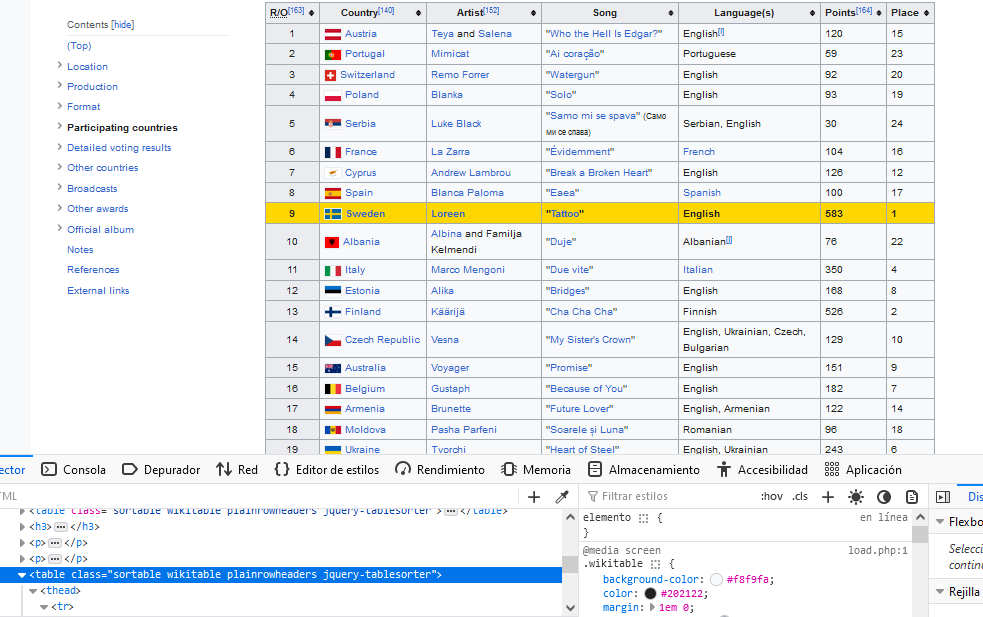

In [4]:
from IPython.display import Image

Image(filename= r"C:\Users\josue\Desktop\Data Science\Proyectos\Data Web Scraping\Data-Web-Scraping\captura_tabla_web.png")

In [5]:
# Utilizamos el método find_all() de BeautifulSoup para buscar todas las etiquetas <table> con el atributo class igual
# a "wikitable" en el contenido analizado de la página web. Estas tablas suelen tener una estructura específica en
# Wikipedia. Almacenamos los resultados en la variable tablas_html.

tablas_html = soup.find_all("table", {"class": "wikitable"})

# Si encuentra una tabla pasará al siguiente paso. En nuestro caso hay varias
if tablas_html:
    # Esta linea nos permite elegir la tabla que queremos. En nuestro caso corresponde con el índice "5".
    tabla_deseada = tablas_html[5] 
    # Lista vacía para almacenar datos de la tabla.
    data = []
    # Método find_all() de la variable tabla_deseada para encontrar todas las filas <tr> de la tabla. Almacenamos los resultados en la variable filas.
    filas = tabla_deseada.find_all('tr')
    # Recorremos cada fila en la lista filas utilizando un bucle for. Dentro del bucle, utilizamos el método find_all() para encontrar todas las celdas <td> y <th> en cada fila y almacenarlas en la variable celdas.
    for fila in filas:
        celdas = fila.find_all(['td', 'th'])
        #Creamos una lista llamada fila_data utilizando una comprensión de lista. Recorremos las celdas en la lista celdas y, para cada celda, extraemos su contenido de texto utilizando el atributo text y eliminamos cualquier espacio en blanco adicional utilizando strip(). Luego, añadimos el contenido de la celda a la lista fila_data.
        fila_data = [celda.text.strip() for celda in celdas]
        # Agregamos la lista fila_data a la lista data, lo que nos permite construir una estructura de datos que representa la tabla.
        data.append(fila_data)
    #creamos un DataFrame de pandas utilizando la lista data.
    df = pd.DataFrame(data)
else:
    print("No se encontraron tablas con la clase 'wikitable' en la página web.")

Imprimimos el DataFrame para ver si el resultado es el esperado.

In [6]:
df

,0,1,2,3,4,5,6
0,R/O[163],Country[140],Artist[152],Song,Language(s),Points[164],Place
1,1,Austria,Teya and Salena,"""Who the Hell Is Edgar?""",English[i],120,15
2,2,Portugal,Mimicat,"""Ai coração""",Portuguese,59,23
3,3,Switzerland,Remo Forrer,"""Watergun""",English,92,20
4,4,Poland,Blanka,"""Solo""",English,93,19
5,5,Serbia,Luke Black,"""Samo mi se spava"" (Само ми се спава)","Serbian, English",30,24
6,6,France,La Zarra,"""Évidemment""",French,104,16
7,7,Cyprus,Andrew Lambrou,"""Break a Broken Heart""",English,126,12
8,8,Spain,Blanca Paloma,"""Eaea""",Spanish,100,17
9,9,Sweden,Loreen,"""Tattoo""",English,583,1


##### Limpieza de datos

Ahora que hemos extraido nuestra tabla correctamente y la hemos guardado en un DataFrame, continuamos con la limpieza de datos.

A primera vista, podemos observar que:

- Los nombres de las columnas se encuentran en la primera fila.

- La primera columna no contiene información util.

- Los nombres de las columnas contienen datos sobrantes.

In [7]:
# Obtener los valores de la primera fila como nombres de columna
new_columns = df.iloc[0]

# Asignar los nuevos nombres de columna utilizando el método rename()
df = df.rename(columns=new_columns)

# Eliminar la primera fila que ahora se ha convertido en los nombres de columna
df = df[1:]

In [8]:
# Eliminar la primera columna utilizando el método drop()
df = df.drop(df.columns[0], axis=1)

In [9]:
# Modificar los nombres de columna utilizando el método rename() y una función lambda
df = df.rename(columns=lambda x: x.split('[')[0])

Mostramos el resultado de los pasos anteriores.

In [10]:
df.head(3)

,Country,Artist,Song,Language(s),Points,Place
1,Austria,Teya and Salena,"""Who the Hell Is Edgar?""",English[i],120,15
2,Portugal,Mimicat,"""Ai coração""",Portuguese,59,23
3,Switzerland,Remo Forrer,"""Watergun""",English,92,20


Ahora vamos a eliminar las comillas en los valores de la columna `Song` y los datos entre corchetes en`Points`.

In [11]:
# Eliminar las comillas utilizando el método str.replace()
df['Song'] = df['Song'].str.replace('"', '')

In [12]:
# Eliminar la parte entre corchetes utilizando el método str.replace() con una expresión regular
df['Language(s)'] = df['Language(s)'].str.replace(r'\[.*\]', '', regex=True)

Nos interesa que los valores de las dos últimas columnas sean del tipo número entero. Primero comprobamos los tipos de variable con el método `dtypes`, y como observamos que no es nuestro caso lo covertimos a número entero (int) aplicando el método `astype`.

In [13]:
df.dtypes

Country        object
Artist         object
Song           object
Language(s)    object
Points         object
Place          object
dtype: object

In [14]:
df['Place'] = df['Place'].astype(int)
df['Points'] = df['Points'].astype(int)

In [15]:
df

,Country,Artist,Song,Language(s),Points,Place
1,Austria,Teya and Salena,Who the Hell Is Edgar?,English,120,15
2,Portugal,Mimicat,Ai coração,Portuguese,59,23
3,Switzerland,Remo Forrer,Watergun,English,92,20
4,Poland,Blanka,Solo,English,93,19
5,Serbia,Luke Black,Samo mi se spava (Само ми се спава),"Serbian, English",30,24
6,France,La Zarra,Évidemment,French,104,16
7,Cyprus,Andrew Lambrou,Break a Broken Heart,English,126,12
8,Spain,Blanca Paloma,Eaea,Spanish,100,17
9,Sweden,Loreen,Tattoo,English,583,1
10,Albania,Albina and Familja Kelmendi,Duje,Albanian,76,22


En este punto, hemos logrado obtener la tabla con la puntuación de los paises participantes de Eurovisión 2023 de la manera que deseamos. Por úlimo, la guardamos en CSV.

In [16]:
df.to_csv('Tabla_Resultados_Eurovision_2023.csv', index=False)